In [1]:
import pandas as pd
from sklearn.datasets import load_digits

digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.20)

In [4]:
from sklearn.neighbors import KNeighborsClassifier



In [7]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors': [3, 10, 20],
}, cv=5, return_train_score=False)

clf.fit(x_train, y_train)
clf.cv_results_


{'mean_fit_time': array([0.0022047 , 0.00079126, 0.00079846]),
 'std_fit_time': array([0.00075453, 0.00039591, 0.00039924]),
 'mean_score_time': array([0.02452259, 0.0189611 , 0.01689487]),
 'std_score_time': array([0.00624713, 0.00207738, 0.00083939]),
 'param_n_neighbors': masked_array(data=[3, 10, 20],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3}, {'n_neighbors': 10}, {'n_neighbors': 20}],
 'split0_test_score': array([0.98611111, 0.97569444, 0.95138889]),
 'split1_test_score': array([0.98611111, 0.96180556, 0.95138889]),
 'split2_test_score': array([0.9825784 , 0.97560976, 0.96515679]),
 'split3_test_score': array([0.98954704, 0.98606272, 0.97212544]),
 'split4_test_score': array([0.97560976, 0.97212544, 0.97212544]),
 'mean_test_score': array([0.98399148, 0.97425958, 0.96243709]),
 'std_test_score': array([0.00473498, 0.00778271, 0.00937284]),
 'rank_test_score': array([1, 2, 3])}

In [8]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002205,0.000755,0.024523,0.006247,3,{'n_neighbors': 3},0.986111,0.986111,0.982578,0.989547,0.975610,0.983991,0.004735,1
1,0.000791,0.000396,0.018961,0.002077,10,{'n_neighbors': 10},0.975694,0.961806,0.975610,0.986063,0.972125,0.974260,0.007783,2
2,0.000798,0.000399,0.016895,0.000839,20,{'n_neighbors': 20},0.951389,0.951389,0.965157,0.972125,0.972125,0.962437,0.009373,3


In [11]:
df[['param_n_neighbors', 'params', 'mean_test_score']]

,param_n_neighbors,params,mean_test_score
0,3,{'n_neighbors': 3},0.983991
1,10,{'n_neighbors': 10},0.974260
2,20,{'n_neighbors': 20},0.962437


In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
knn.score(x_test, y_test)

0.9944444444444445

In [14]:
from sklearn.metrics import confusion_matrix
 
y_pred = knn.predict(x_test)

In [15]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 36]], dtype=int64)

Text(0.5, 33.0, 'Truth')

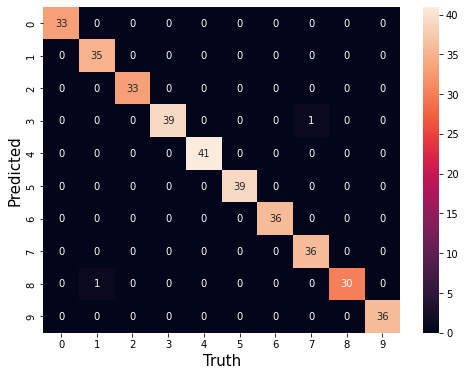

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True)
plt.ylabel('Predicted', fontsize=15)
plt.xlabel('Truth', fontsize=15)


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.99        35
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        40
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00        39
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       1.00      0.97      0.98        31
           9       1.00      1.00      1.00        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

